In [1]:
from osgeo import gdal, gdalconst
from osgeo.gdalconst import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow import keras

C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
img_path = './FinalQ4Image.jpg'

In [3]:
ds = gdal.Open(img_path, GA_ReadOnly)

In [4]:
n_band = ds.RasterCount

In [5]:
img_width = 2448
img_height = 2448

In [6]:
img = np.zeros((img_width,img_height,n_band))
for i in range(n_band):
    band = ds.GetRasterBand(i+1)
    data = band.ReadAsArray()
    img[:,:,i] = data
data = None
band = None

In [7]:
#mgU = img.mean()
#imgStd = img.std()
img = (img)/255

In [8]:
pointWater = pd.read_csv('./water_samples.csv').values
pointUrban = pd.read_csv('./urban_samples.csv').values
pointAgri = pd.read_csv('./agriculture_samples.csv').values
pointRange = pd.read_csv('./Range_samples.csv').values
pointBarren = pd.read_csv('./barren_samples.csv').values

In [9]:
def imgPointToData(img,point):
    dataOut = []
    for i in range(len(point)):
        dataOut.append(img[point[i,0],point[i,1]])
    return np.array(dataOut)

In [10]:
dataWater = imgPointToData(img,pointWater)
dataUrban = imgPointToData(img,pointUrban)
dataAgri = imgPointToData(img,pointAgri)
dataRange = imgPointToData(img,pointRange)
dataBarren = imgPointToData(img,pointBarren)

In [11]:
X_train = np.concatenate((dataWater[:8000],dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train = np.ones((len(X_train)))
y_train[:8000] *= 0
y_train[8000:16000] *= 1
y_train[16000:24000] *= 2
y_train[24000:36000] *= 3
y_train[36000:40000] *= 4

X_test = np.concatenate((dataWater[8000:],dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test = np.ones((len(X_test)))
y_test[:2000] *= 0
y_test[2000:4000] *= 1
y_test[4000:6000] *= 2
y_test[6000:8000] *= 3
y_test[8000:10000] *= 4

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 3)
(40000,)
(10000, 3)
(10000,)


In [13]:
idx1 = np.random.permutation(len(X_train))
X_train = X_train[idx1]
y_train = y_train[idx1]

idx2 = np.random.permutation(len(X_test))
X_test = X_test[idx2]
y_test = y_test[idx2]

#X_train = X_train/255
#X_test = X_test/255

In [14]:
X_train1 = np.concatenate((dataWater[:8000],dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train1 = np.ones((len(X_train)))
y_train1[:8000] *= 0
y_train1[8000:40000] *= 1


X_test1  = np.concatenate((dataWater[8000:],dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test1 = np.ones((len(X_test1)))
y_test1[:2000] *= 0
y_test1[2000:10000] *= 1

idx1 = np.random.permutation(len(X_train1))
X_train1 = X_train1[idx1]
y_train1 = y_train1[idx1]

idx2 = np.random.permutation(len(X_test1))
X_test1 = X_test1[idx2]
y_test1 = y_test1[idx2]



In [15]:
X_train2 = np.concatenate((dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train2 = np.ones((len(X_train2)))
y_train2[:8000] *= 0
y_train2[8000:16000] *= 1
y_train2[16000:24000] *= 2
y_train2[24000:36000] *= 3


X_test2 = np.concatenate((dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test2 = np.ones((len(X_test2)))
y_test2[:2000] *= 0
y_test2[2000:4000] *= 1
y_test2[4000:6000] *= 2
y_test2[6000:8000] *= 3


idx1 = np.random.permutation(len(X_train2))
X_train2 = X_train2[idx1]
y_train2 = y_train2[idx1]

idx2 = np.random.permutation(len(X_test2))
X_test2 = X_test2[idx2]
y_test2 = y_test2[idx2]

#X_train2 = X_train2/255
#X_test2 = X_test2/255

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(32000, 3)
(32000,)
(8000, 3)
(8000,)


In [16]:
y_train_encode = keras.utils.to_categorical(y_train)
y_test_encode = keras.utils.to_categorical(y_test)
y_train_encode2 = keras.utils.to_categorical(y_train2)
y_test_encode2 = keras.utils.to_categorical(y_test2)

In [26]:
def nnmodel(input_shape):
    X_input = keras.layers.Input((input_shape))
    X = keras.layers.Dense(128,activation='relu')(X_input)
    X = keras.layers.Dense(32,activation='relu')(X)
    X = keras.layers.Dense(1,activation='sigmoid')(X)
    model = keras.models.Model(inputs=X_input, outputs=X, name='model')
    return model

In [27]:
mymodel = nnmodel(X_train1[0].shape)
mymodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [28]:
mymodel.fit(X_train1,y_train1,batch_size=32,epochs=10,validation_data=(X_test1,y_test1))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 124us/sample - loss: 0.1427 - acc: 0.9418 - val_loss: 0.0721 - val_acc: 0.9742
Epoch 2/10
40000/40000 [==============================] - 5s 120us/sample - loss: 0.0673 - acc: 0.9753 - val_loss: 0.0606 - val_acc: 0.9777
Epoch 3/10
40000/40000 [==============================] - 5s 120us/sample - loss: 0.0582 - acc: 0.9786 - val_loss: 0.0526 - val_acc: 0.9811
Epoch 4/10
40000/40000 [==============================] - 5s 121us/sample - loss: 0.0534 - acc: 0.9807 - val_loss: 0.0503 - val_acc: 0.9823
Epoch 5/10
40000/40000 [==============================] - 5s 127us/sample - loss: 0.0516 - acc: 0.9817 - val_loss: 0.0485 - val_acc: 0.9819
Epoch 6/10
40000/40000 [==============================] - 5s 132us/sample - loss: 0.0504 - acc: 0.9814 - val_loss: 0.0488 - val_acc: 0.9815
Epoch 7/10
40000/40000 [==============================] - 5s 136us/sample - loss: 0.0495 - acc: 0.9824 - val_l

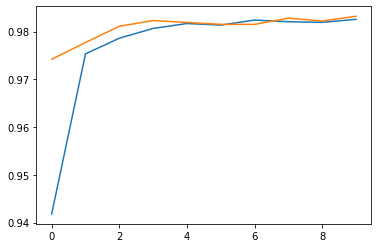

In [29]:
his = mymodel.history.history
plt.plot(his['acc'])
plt.plot(his['val_acc'])

In [30]:
pred1 = mymodel.predict(X_test1)
pred1 = (pred1>0.5)*1

In [31]:
print(classification_report(y_test1,pred1))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2000
         1.0       0.99      0.99      0.99      8000

    accuracy                           0.98     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
def nnmodel2(input_shape):
    X_input = keras.layers.Input((input_shape))
    X = keras.layers.Dense(1024,activation='relu')(X_input)
    X = keras.layers.Dense(256,activation='relu')(X)
    X = keras.layers.Dense(4,activation='softmax')(X)
    model = keras.models.Model(inputs=X_input, outputs=X, name='model')
    return model

In [34]:
mymodel2 = nnmodel2(X_train2[0].shape)
opt = keras.optimizers.Adam(lr=0.0005)
mymodel2.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
mymodel2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              4096      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 1028      
Total params: 267,524
Trainable params: 267,524
Non-trainable params: 0
_________________________________________________________________


In [35]:
mymodel2.fit(X_train2,y_train_encode2,batch_size=32,epochs=50,validation_data=(X_test2,y_test_encode2))

Train on 32000 samples, validate on 8000 samples
Epoch 1/50
32000/32000 [==============================] - 5s 160us/sample - loss: 1.0615 - acc: 0.5530 - val_loss: 1.0056 - val_acc: 0.5775
Epoch 2/50
32000/32000 [==============================] - 4s 135us/sample - loss: 1.0065 - acc: 0.5820 - val_loss: 1.0167 - val_acc: 0.5680
Epoch 3/50
32000/32000 [==============================] - 4s 127us/sample - loss: 0.9999 - acc: 0.5869 - val_loss: 0.9989 - val_acc: 0.5866
Epoch 4/50
32000/32000 [==============================] - 4s 126us/sample - loss: 0.9939 - acc: 0.5878 - val_loss: 0.9967 - val_acc: 0.5764
Epoch 5/50
32000/32000 [==============================] - 4s 125us/sample - loss: 0.9857 - acc: 0.5934 - val_loss: 0.9806 - val_acc: 0.5844
Epoch 6/50
32000/32000 [==============================] - 4s 125us/sample - loss: 0.9784 - acc: 0.5970 - val_loss: 0.9850 - val_acc: 0.5946
Epoch 7/50
32000/32000 [==============================] - 5s 147us/sample - loss: 0.9746 - acc: 0.6000 - val_lo

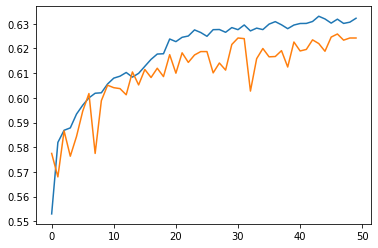

In [36]:
his2 = mymodel2.history.history
plt.plot(his2['acc'])
plt.plot(his2['val_acc'])

In [37]:
pred2 = np.argmax(mymodel2.predict(X_test2),axis=1)

In [38]:
print(classification_report(y_test2,pred2))

              precision    recall  f1-score   support

         0.0       0.69      0.50      0.58      2000
         1.0       0.54      0.58      0.56      2000
         2.0       0.56      0.64      0.59      2000
         3.0       0.74      0.78      0.76      2000

    accuracy                           0.62      8000
   macro avg       0.63      0.62      0.62      8000
weighted avg       0.63      0.62      0.62      8000



In [39]:
def commodel(data):
    l1 = np.round(mymodel.predict(data))
    l2 = np.argmax(mymodel2.predict(data),axis=1)
    outdata = []
    for i in range(len(data)):
        if(l1[i]==0):
            outdata.append(0)
        else:
            outdata.append(l2[i]+1)
    return np.array(outdata)

In [40]:
pred = commodel(X_test)

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2000
         1.0       0.68      0.50      0.58      2000
         2.0       0.52      0.55      0.53      2000
         3.0       0.56      0.64      0.59      2000
         4.0       0.74      0.78      0.76      2000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [64]:
img = img.reshape(((2448* 2448, 3)))
#img = img*255

In [66]:
predimg = commodel(img)

In [67]:
predimg_dec = predimg

In [68]:
colormap = np.zeros_like(img).astype(int)

In [69]:
for i in range(len(colormap)):
    if(predimg_dec[i] == 0):
        #water
        colormap[i] = [0,0,255]
    elif(predimg_dec[i]==1):
        #urban
        colormap[i] = [0,255,255]
    elif (predimg_dec[i] ==2):
        #argi
        colormap[i] = [255,255,0]
    elif (predimg_dec[i] == 3):
        #range
        colormap[i] = [255,0,255]
    elif (predimg_dec[i] == 4):
        #barren
        colormap[i] = [255,255,255]

In [70]:
colormap = colormap.reshape((2448,2448,3))

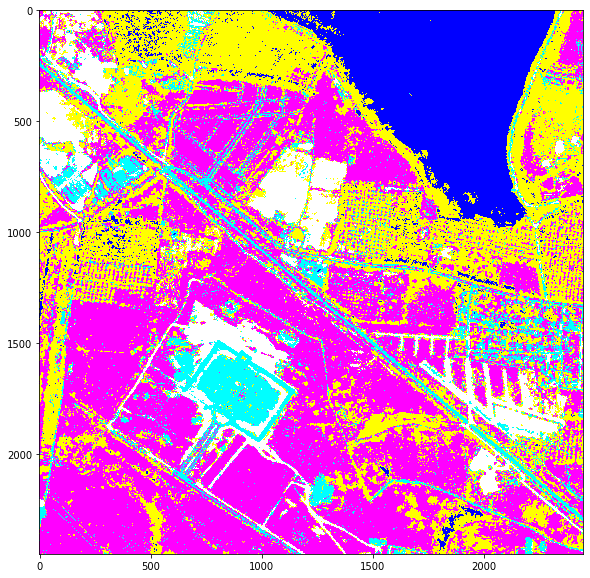

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(colormap)

In [72]:
from PIL import Image

In [73]:
im = Image.fromarray(colormap.astype(np.uint8))
im.save('./final4-lcm.png')
print('saved "./final4-lcm.png" ')

saved "./final4-lcm.png" 


In [74]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score

In [75]:
confmat = confusion_matrix(y_test,pred)
print('----- Confusion matrix -----')
print(confmat)

----- Confusion matrix -----
[[1916    4   80    0    0]
 [  19 1007  415  373  186]
 [  49  148 1106  499  198]
 [  16  156  400 1274  154]
 [   0  156  145  142 1557]]


In [84]:
user_acc = [confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]]/np.sum(confmat,axis=1)*100
print(f'User accuracy : {user_acc} %')

User accuracy : [95.8  50.35 55.3  63.7  77.85] %


In [88]:
prod_acc = [confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]]/np.sum(confmat,axis=0)*100
print(f'Producer accuracy : {prod_acc} %')

Producer accuracy : [95.8        68.45683209 51.53774464 55.68181818 74.31980907] %


In [87]:
overall_acc = np.sum([confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]])/100
print(f'Overall accuracy : {overall_acc} %')

Overall accuracy : 68.6 %


In [79]:
(overall_acc-1/5)/(1-1/5)

0.6075

In [80]:
kappa = cohen_kappa_score(y_test,pred)
print(f'Kappa Score : {kappa}')

Kappa Score : 0.6074999999999999


In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2000
         1.0       0.68      0.50      0.58      2000
         2.0       0.52      0.55      0.53      2000
         3.0       0.56      0.64      0.59      2000
         4.0       0.74      0.78      0.76      2000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [82]:
confmat[0]

array([1916,    4,   80,    0,    0], dtype=int64)

In [83]:
np.sum(confmat,axis=0)

array([2000, 1471, 2146, 2288, 2095], dtype=int64)